# Шлях вантажеперевізок Нова Пошта
1. Повний граф. Напрямок перевезень не має значення.
2. 6 Вернин: A...F. 6 міст призначення.
3. Рекурсивна реалізація алгоритму DFS.
4. Рекурсивна реалізація алгоритму BFS
5.
6.


#Завдання 1

['A', 'B', 'C', 'D', 'E', 'F']
[('A', 'B'), ('A', 'C'), ('A', 'D'), ('A', 'E'), ('A', 'F'), ('B', 'C'), ('B', 'D'), ('B', 'E'), ('B', 'F'), ('C', 'D'), ('C', 'E'), ('C', 'F'), ('D', 'E'), ('D', 'F'), ('E', 'F')]


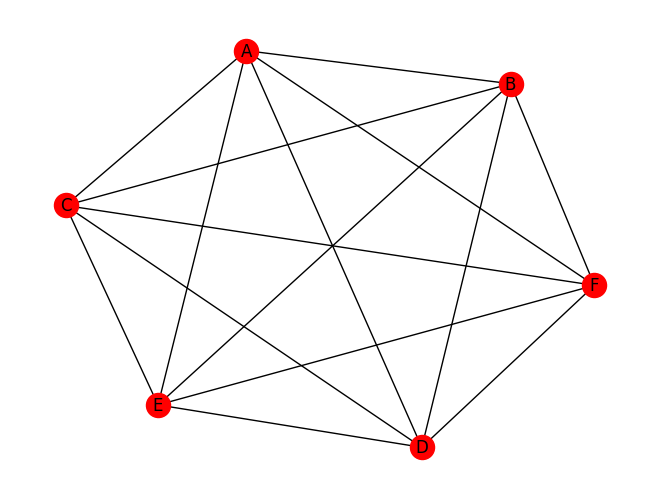

In [38]:
import networkx as nx
import matplotlib.pyplot as plt

# Шлях вантажеперевізок Нова Пошта
D=nx.complete_graph(list(chr(i).upper() for i in range(97,97+6)))
nx.draw(D, with_labels=1, node_color='red')
print(D.nodes())
print(D.edges())

#Завдання 2

Алгоритм DFS реалізован через рекурсію

In [39]:
def dfs_recursive(graph, vertex, visited=None):
    if visited is None:
        visited = set()
    visited.add(vertex)
    print(vertex, end=' ')  # Відвідуємо вершину
    for neighbor in graph[vertex]:
        if neighbor not in visited:
            dfs_recursive(graph, neighbor, visited)

# Виклик функції DFS
dfs_recursive(D, 'C')

C A B D E F 

Алгоритм BFS реалізован через рекурсію

In [40]:
from collections import deque

def bfs_recursive(graph, queue, visited=None):
    # Перевіряємо, чи існує множина відвіданих вершин, якщо ні, то ініціалізуємо нову
    if visited is None:
        visited = set()
    # Якщо черга порожня, завершуємо рекурсію
    if not queue:
        return
    # Вилучаємо вершину з початку черги
    vertex = queue.popleft()
    # Перевіряємо, чи відвідували раніше дану вершину
    if vertex not in visited:
        # Якщо не відвідували, друкуємо вершину
        print(vertex, end=" ")
        # Додаємо вершину до множини відвіданих вершин.
        visited.add(vertex)
        # Додаємо невідвіданих сусідів даної вершини в кінець черги.
        queue.extend(set(graph[vertex]) - visited)
    # Рекурсивний виклик функції з тією ж чергою та множиною відвіданих вершин
    bfs_recursive(graph, queue, visited)

# Виклик функції DFS
bfs_recursive(D, deque(["C"]))


C F D A E B 

#Висновок по завданню 2:
Алгоритм DFS, який реалізован через рекурсію, послідовно відвідує всі вершини, починаючи з вхідної вершини.

Алгоритм BFS, який реалізован через рекурсію, спочатку відвідує вхідну вершину,а потім переходить до її сусідніх вершин.А потім щукає ще не відвіданні вершини.




#Завдання 3
Алгоритм Дейкстри

In [63]:

D.add_edge('A','B',weight=4)
D.add_edge('A','C',weight=2)
D.add_edge('A','D',weight=15)
D.add_edge('A','E',weight=4)
D.add_edge('A','F',weight=15)

D.add_edge('B','A',weight=7)
D.add_edge('B','C',weight=3)
D.add_edge('B','D',weight=15)
D.add_edge('B','E',weight=8)
D.add_edge('B','F',weight=9)

D.add_edge('C','A',weight=5)
D.add_edge('C','B',weight=8)
D.add_edge('C','D',weight=1)
D.add_edge('C','E',weight=9)
D.add_edge('C','F',weight=4)

D.add_edge('D','A',weight=11)
D.add_edge('D','B',weight=6)
D.add_edge('D','C',weight=1)
D.add_edge('D','E',weight=7)
D.add_edge('D','F',weight=2)

D.add_edge('E','A',weight=12)
D.add_edge('E','B',weight=6)
D.add_edge('E','C',weight=5)
D.add_edge('E','D',weight=4)
D.add_edge('E','F',weight=12)

D.add_edge('F','A',weight=1)
D.add_edge('F','B',weight=1)
D.add_edge('F','C',weight=5)
D.add_edge('F','D',weight=14)
D.add_edge('F','E',weight=25)

print(nx.single_source_dijkstra_path_length(D, 'A', cutoff=None, weight='weight'))
print(nx.single_source_dijkstra_path_length(D, 'B', cutoff=None, weight='weight'))
print(nx.single_source_dijkstra_path_length(D, 'C', cutoff=None, weight='weight'))
print(nx.single_source_dijkstra_path_length(D, 'D', cutoff=None, weight='weight'))
print(nx.single_source_dijkstra_path_length(D, 'E', cutoff=None, weight='weight'))
print(nx.single_source_dijkstra_path_length(D, 'F', cutoff=None, weight='weight'))

{'A': 0, 'F': 1, 'B': 2, 'C': 5, 'D': 6, 'E': 8}
{'B': 0, 'F': 1, 'A': 2, 'D': 6, 'E': 6, 'C': 6}
{'C': 0, 'D': 1, 'A': 5, 'E': 5, 'F': 5, 'B': 6}
{'D': 0, 'C': 1, 'E': 4, 'B': 6, 'A': 6, 'F': 6}
{'E': 0, 'D': 4, 'C': 5, 'B': 6, 'F': 7, 'A': 8}
{'F': 0, 'A': 1, 'B': 1, 'C': 5, 'D': 6, 'E': 7}
